In [46]:
# Copyright 2019 Institut für Nachrichtentechnik, RWTH Aachen University
%matplotlib notebook

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import clear_output, display, HTML
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from ient_nb.ient_plots import *

# Definitions
unitstep = lambda t: np.where(t>=0, 1, 0)
rect     = lambda t: unitstep(t+0.5) - unitstep(t-0.5)
tri      = lambda t: rect(t/2)*(1-abs(t))
si       = lambda t: np.sinc(t/np.pi)

<div>
    <img src="ient_nb/figures/rwth_ient_logo@2x.png" style="float: right;height: 5em;">
</div>

# Autokorrelationsfunktion Binäre Rechteckfolge

Binäre Rechteckfolge ist definiert als
$$s(t) = \sum_{n=-\infty}^{\infty} a_n \cdot \mathrm{rect} \left ( \frac{t-nT}{T} \right )$$ 
mit $\mathrm{Prob}\{a_n=0\}=\mathrm{Prob}\{a_n=1\}=\frac{1}{2}$.

In [47]:
N = 10000 # Anzahl an Takten
T = 10 # Taktzeit
an = np.random.randint(2, size=N) # a_n Zufallsvektor mit Nullen und Einsen
s = np.repeat(an, T);             # konstruiere Vektor mit Einsen und Nullen gehalten für T
(tdash,deltat) = np.linspace(0,len(s)/T,len(s), retstep=True) # normalisierte t-Achse (t'=t/T)

an[0:50]

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1])

Plotte erste 50 Takte von $s(t)$:

<IPython.core.display.Javascript object>


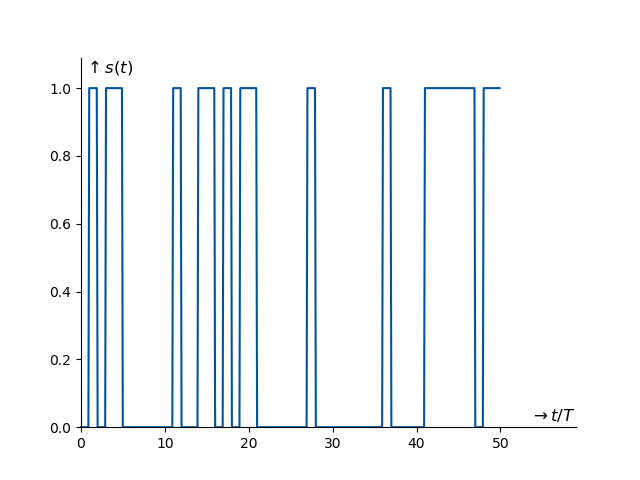

In [48]:
fig,ax = plt.subplots(1, 1); plt.plot(tdash[0:50*T], s[0:50*T], 'rwth');
ax.set_ylabel(r'$\uparrow s(t)$'); ax.set_xlabel(r'$\rightarrow t/T$');
ax.set_xlim([-0.1,59]); ax.set_ylim(0,1.09); ient_axis(ax);

Berechne Mittelwert $m_s$ und Varianz $\sigma_s^2$

In [ ]:
m_s = np.mean(s); var_s = np.std(s)**2; 
print('Mittelwert m_s = {0:.2f}, Varianz sigma_s^2 = {1:.2f}'.format(m_s,var_s));

Die Autokorrelationsfuntkion von Leistungssignalen ist definiert als:
$$ \varphi_{ss}^{\mathrm{L}} (\tau) = \lim_{T' \rightarrow \infty} \frac{1}{2T'} \int_{-T'}^{T'} s^{\ast}(t) s(t + \tau) \mathrm{d} t $$
Das Problem mit der Unendlichkeit umgehen wir durch eine längere Messdauer ($T'=5T$) und zyklische verschiebung des Signals. 
Es reicht aus, die AKF im Bereich $ -5T < \tau < 5T $ zu berechnen.

In [ ]:
# Estimate phi_ss
shifts = np.arange(-5*T,5*T+1);
taudash = shifts/T # normalisierte tau-Achse: tau'=tau/T
y = map(lambda a: np.dot(np.roll(s,a).T, s), shifts) # Skalarprodukt (dot) mit zyklischer Verschiebung (shift)
phi_ss_est = np.array(list(y))/N/T

# Calculate phi_ss
phi_ss = 0.25 + 0.25*tri(taudash)

# Plot
fig,ax = plt.subplots(1,1); 
plt.plot(taudash, phi_ss, 'k--', label='Berechnet');
plt.plot(taudash, phi_ss_est, 'rwth', label='Geschätzt');
ax.set_xlabel(r'$\rightarrow \tau/T$'); ax.set_ylabel(r'$\uparrow \varphi_{ss}^{\mathrm{L}}(\tau)$');
ax.set_xlim([-5,5.25]); ax.set_ylim(0, 0.59); ax.legend(); ient_grid(ax); ient_axis(ax);

## Interaktive Demo

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(8,5))
@widgets.interact(tt=widgets.FloatSlider(min=-5,max=5,step=0.2,value=0,description=r'$\tau/T$:'))
def update_plots(tt=0):
    N_crop = 30 # crop some cycles
    sshift = np.roll(s,int(tt*T))
    t_ind = np.where(taudash>=tt); t_ind = t_ind[0][0];  #g_plot = g.copy(); #g_plot[t_ind:] = np.nan
    
    if not axs[0].lines: 
        ax = axs[0] # first axis: s and shifted version of s
        ax.plot(tdash[0:N_crop*T], s[0:N_crop*T], 'rwth')
        ax.plot(tdash[0:N_crop*T], sshift[0:N_crop*T], 'grun')
        ax.set_xlabel(r'$\rightarrow t$'); ax.set_ylabel(r'$\uparrow s(t)$'); 
        ax.set_xlim([-0.1,N_crop*1.1]); ax.set_ylim(0,1.19); ient_axis(ax)

        ax = axs[1] # second axis: phi_ss and marker
        ax.plot(taudash, phi_ss, 'rwth')
        ax.plot([tt, tt], [0, phi_ss[t_ind]], 'ko--', lw=1);
        ax.set_ylabel(r'$\uparrow \varphi_{ss}^{\mathrm{L}}(\tau)$'); ax.set_xlabel(r'$\rightarrow \tau/T$');
        ax.set_xlim([-5,5.9]); ax.set_ylim(0,0.55); ient_axis(ax)
    else: # update lines
        axs[0].lines[1].set_ydata(sshift[0:N_crop*T]);
        axs[1].lines[1].set_xdata([tt, tt]); 
        axs[1].lines[1].set_ydata([0, phi_ss[t_ind]]);

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources) (OER). Feel free to use the notebook for your own purposes. The code is licensed under the [MIT license](https://opensource.org/licenses/MIT). 

Please attribute the work as follows: 
*Christian Rohlfing, Jens Schneider, Übungsbeispiele zur Vorlesung "Informationsübertragung"*, gehalten von Jens-Rainer Ohm, 2019, Institut für Nachrichtentechnik, RWTH Aachen University.